# twcu12 アンサンブル学習


## アンサンブル学習
参考->slide13

### 準備
slide_and_data\data\data_for_slide13

の中にある以下ファイルをgoogle colab にアップロードしておく

GenjiUtsubo.csv

なお、以下のコードではこのファイルが Shift-JIS であることを仮定しているが、そこはアップロードなどの過程で変わってしまうこともあるので、適宜確認して対応すること。


In [ ]:
#

# randomForest の準備

randomForest を使うためにはrandomForestパッケージを導入しそこに含まれるrandomForestライブラリをロードする必要がある





In [1]:
# 関数 randomForest は未定義である
x <- randomForest(0)

ERROR: ignored

In [2]:
# randomForest のパッケージがないために、randomForest のライブラリはロードできない
library(randomForest)
# エラーになる

ERROR: ignored

In [3]:
# randomForest のパッケージをインストール
install.packages("randomForest", dependencies = T)

# 参考 https://stackoverflow.com/questions/61132182/r-package-randomforest-not-installing

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# 今度は library が可能
library(randomForest)

#これで関数randomForestが利用可能になる

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [6]:
# slide 21

options(encoding = "shift-jis")
d4 <- read.csv("GenjiUtsuho.csv", head = TRUE, row.names = 1)

In [7]:
# 転地(対角線に沿って反転する)

# 転地する前のデータを確認
head(d4)

,X01桐壺,X02帚木,X03空蝉,X04夕顔,X05若紫,X06末摘花,X07紅葉賀,X08花宴,X09葵,X10賢木,⋯,X11内侍のかみ,X12沖つ白波,X13蔵開上,X14蔵開中,X15蔵開下,X16国譲上,X17国譲中,X18国譲下,X19楼の上上,X20楼の上下
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
アキ,20.81599,10.65757,0.00000,10.45369,10.63151,32.57860,0.00000,0.00000,43.63478,41.39073,⋯,74.71050,20.30869,5.404821,0.0000,0.00000,11.39017,11.93175,8.519339,13.56208,11.25999
アソビ,104.07993,10.65757,0.00000,10.45369,10.63151,16.28930,53.96654,49.77601,10.90869,72.43377,⋯,32.01878,40.61738,16.214463,9.0212,23.34085,22.78034,35.79525,29.817686,27.12416,39.40998
アタリ,20.81599,31.97272,0.00000,62.72214,21.26302,81.44649,0.00000,49.77601,21.81739,20.69536,⋯,0.00000,0.00000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000
アテミヤ,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,21.34586,60.92608,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,13.56208,22.51999
アハレ,0.00000,63.94543,45.72474,20.90738,0.00000,0.00000,0.00000,49.77601,43.63478,31.04305,⋯,0.00000,0.00000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000
アマギミ,0.00000,0.00000,0.00000,62.72214,85.05209,0.00000,17.98885,0.00000,0.00000,10.34768,⋯,0.00000,0.00000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000


In [8]:
# 転地する
d5 <- t(d4)
head(d5)

,アキ,アソビ,アタリ,アテミヤ,アハレ,アマギミ,アヤ,アリサマ,イチノミヤ,イヌミヤ,⋯,ワタリ,ワラハ,ヰン,ヱ,ヲトコ,ヲノコ,ヲリ,ヲリヲリ,ヲンナ,ヲンナギミ
X01桐壺,20.81599,104.07993,20.81599,0,0.00000,0.00000,0,145.71191,0,0,⋯,0.00000,0.00000,0.00000,41.63197,0.00000,0,166.52789,62.44796,20.81599,20.81599
X02帚木,10.65757,10.65757,31.97272,0,63.94543,0.00000,0,170.52116,0,0,⋯,31.97272,21.31514,0.00000,0.00000,53.28786,0,85.26058,63.94543,223.80902,10.65757
X03空蝉,0.00000,0.00000,0.00000,0,45.72474,0.00000,0,91.44947,0,0,⋯,91.44947,91.44947,0.00000,0.00000,0.00000,0,182.89895,0.00000,91.44947,0.00000
X04夕顔,10.45369,10.45369,62.72214,0,20.90738,62.72214,0,114.99059,0,0,⋯,62.72214,20.90738,41.81476,20.90738,20.90738,0,62.72214,10.45369,188.16642,20.90738
X05若紫,10.63151,10.63151,21.26302,0,0.00000,85.05209,0,191.36721,0,0,⋯,21.26302,31.89454,0.00000,106.31512,10.63151,0,63.78907,10.63151,53.15756,42.52605
X06末摘花,32.57860,16.28930,81.44649,0,0.00000,0.00000,0,211.76087,0,0,⋯,48.86789,0.00000,0.00000,16.28930,48.86789,0,114.02509,65.15719,81.44649,32.57860


In [9]:
# カテゴリ付与の準備

c(rep("G",54), rep("U",20))

[1] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
[20] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
[39] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "U" "U" "U"
[58] "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U" "U"

In [10]:
# データフレーム
d6 <- data.frame(d5, class=c(rep("G",54), rep("U",20)))
head(d6)

,アキ,アソビ,アタリ,アテミヤ,アハレ,アマギミ,アヤ,アリサマ,イチノミヤ,イヌミヤ,⋯,ワラハ,ヰン,ヱ,ヲトコ,ヲノコ,ヲリ,ヲリヲリ,ヲンナ,ヲンナギミ,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X01桐壺,20.81599,104.07993,20.81599,0,0.00000,0.00000,0,145.71191,0,0,⋯,0.00000,0.00000,41.63197,0.00000,0,166.52789,62.44796,20.81599,20.81599,G
X02帚木,10.65757,10.65757,31.97272,0,63.94543,0.00000,0,170.52116,0,0,⋯,21.31514,0.00000,0.00000,53.28786,0,85.26058,63.94543,223.80902,10.65757,G
X03空蝉,0.00000,0.00000,0.00000,0,45.72474,0.00000,0,91.44947,0,0,⋯,91.44947,0.00000,0.00000,0.00000,0,182.89895,0.00000,91.44947,0.00000,G
X04夕顔,10.45369,10.45369,62.72214,0,20.90738,62.72214,0,114.99059,0,0,⋯,20.90738,41.81476,20.90738,20.90738,0,62.72214,10.45369,188.16642,20.90738,G
X05若紫,10.63151,10.63151,21.26302,0,0.00000,85.05209,0,191.36721,0,0,⋯,31.89454,0.00000,106.31512,10.63151,0,63.78907,10.63151,53.15756,42.52605,G
X06末摘花,32.57860,16.28930,81.44649,0,0.00000,0.00000,0,211.76087,0,0,⋯,0.00000,0.00000,16.28930,48.86789,0,114.02509,65.15719,81.44649,32.57860,G


In [11]:
d6$class <- as.factor(d6$class)

In [12]:
head(d6)

,アキ,アソビ,アタリ,アテミヤ,アハレ,アマギミ,アヤ,アリサマ,イチノミヤ,イヌミヤ,⋯,ワラハ,ヰン,ヱ,ヲトコ,ヲノコ,ヲリ,ヲリヲリ,ヲンナ,ヲンナギミ,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
X01桐壺,20.81599,104.07993,20.81599,0,0.00000,0.00000,0,145.71191,0,0,⋯,0.00000,0.00000,41.63197,0.00000,0,166.52789,62.44796,20.81599,20.81599,G
X02帚木,10.65757,10.65757,31.97272,0,63.94543,0.00000,0,170.52116,0,0,⋯,21.31514,0.00000,0.00000,53.28786,0,85.26058,63.94543,223.80902,10.65757,G
X03空蝉,0.00000,0.00000,0.00000,0,45.72474,0.00000,0,91.44947,0,0,⋯,91.44947,0.00000,0.00000,0.00000,0,182.89895,0.00000,91.44947,0.00000,G
X04夕顔,10.45369,10.45369,62.72214,0,20.90738,62.72214,0,114.99059,0,0,⋯,20.90738,41.81476,20.90738,20.90738,0,62.72214,10.45369,188.16642,20.90738,G
X05若紫,10.63151,10.63151,21.26302,0,0.00000,85.05209,0,191.36721,0,0,⋯,31.89454,0.00000,106.31512,10.63151,0,63.78907,10.63151,53.15756,42.52605,G
X06末摘花,32.57860,16.28930,81.44649,0,0.00000,0.00000,0,211.76087,0,0,⋯,0.00000,0.00000,16.28930,48.86789,0,114.02509,65.15719,81.44649,32.57860,G


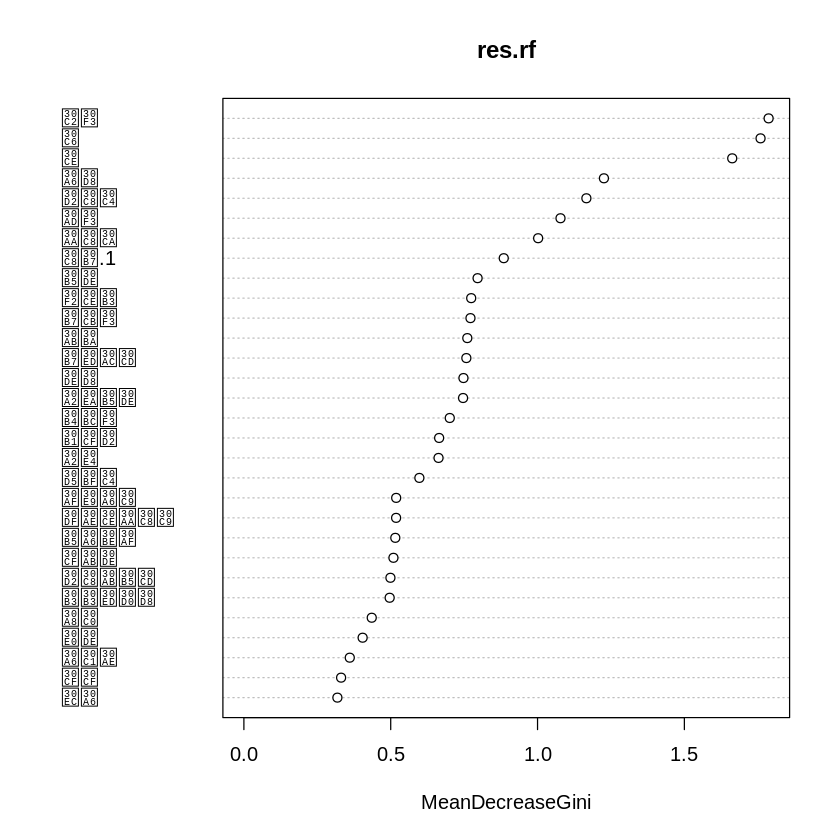

In [13]:
# p22 . ランダムフォレストの実行


res.rf <- randomForest(class ~ .,  data = d6)
varImpPlot(res.rf)

In [15]:
head(res.rf)

$call
randomForest(formula = class ~ ., data = d6)

$type
[1] "classification"

$predicted
      X01桐壺       X02帚木       X03空蝉       X04夕顔       X05若紫 
            G             G             G             G             G 
    X06末摘花     X07紅葉賀       X08花宴         X09葵       X10賢木 
            G             G             G             G             G 
    X11花散里       X12須磨       X13明石       X14澪標       X15蓬生 
            G             G             G             G             G 
      X16関屋       X17絵合       X18松風       X19薄雲       X20朝顔 
            G             G             G             G             G 
      X21少女       X22玉鬘       X23初音       X24胡蝶         X25蛍 
            G             G             G             G             G 
      X26常夏       X27篝火       X28野分       X29行幸       X30藤袴 
            G             G             G             G             G 
    X31真木柱       X32梅枝     X33藤裏葉     X34若菜上     X35若菜下 
            G             G             G             G      